In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_holidays = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
df_oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
df_stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
df_test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
df_train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
df_transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')

In [3]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
df_holidays.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [5]:
df_holidays.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [6]:
duplicatas = df_holidays.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [7]:
df_holidays.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

In [8]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
df_oil['date'].max()

'2017-08-31'

In [10]:
df_oil.nunique()

date          1218
dcoilwtico     998
dtype: int64

In [11]:
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [12]:
duplicatas = df_oil.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [13]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [14]:
df_stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [15]:
df_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [16]:
duplicatas = df_stores.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [17]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [18]:
df_test['date'].max()

'2017-08-31'

In [19]:
df_test.shape

(28512, 5)

In [20]:
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [21]:
df_test.nunique()

id             28512
date              16
store_nbr         54
family            33
onpromotion      212
dtype: int64

In [22]:
duplicatas = df_test.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [23]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [24]:
df_train['date'].max()

'2017-08-15'

**Notas:**

* O dataset de treino vai de 01 JAN 2013 até 15 de Agosto de 2017
* O dataset de teste vai de 16 AGO 2017 até 31 de Agosto de 2017
* O dataset de petróleo vai de 01 JAN 2013 até 31 de Agosto de 2017

In [25]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [26]:
df_train.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [27]:
duplicatas = df_train.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [28]:
df_train.shape

(3000888, 6)

In [29]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [30]:
df_transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [31]:
df_transactions.nunique()

date            1682
store_nbr         54
transactions    4993
dtype: int64

In [32]:
duplicatas = df_transactions.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [33]:
# Garantir que a coluna 'date' esteja no tipo datetime
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# Agrupar por data e somar as transações
daily_transactions = df_transactions.groupby('date').transactions.sum().reset_index()

daily_transactions = daily_transactions.sort_values(by='date', ascending=True)

# Adicionar a coluna do dia da semana
daily_transactions['dia_da_semana'] = daily_transactions['date'].dt.day_name()

daily_transactions['hover_text'] = daily_transactions['date'].dt.strftime('%Y-%m-%d') + " (" + daily_transactions['dia_da_semana'] + "): " + daily_transactions['transactions'].astype(str)

fig = px.line(daily_transactions, x='date', y='transactions',
              title='Tendência de Transações das Lojas ao Longo do Tempo',
              hover_name='hover_text',
              line_shape='linear')

fig.update_traces(line=dict(color='black'))

fig.show()


**Notas**

* Ao observar a sazonalidade pode-se notar que o pico de vendas ocorre aos sábados e sempre há um pico gigantesco de vendas nos feriados de 24/12 (Natal) e de Ano novo (31/12), sendo o Natal sempre o que performa melhor; 
* Nos dias 01/11 há sempre uma queda de vendas e é sempre a menor do ano, talvez isso se dê por as lojas não abrirem e/ ou operar por poucas horas

In [34]:
# Mesclar o DataFrame de feriados com o DataFrame de transações diárias
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_merged = pd.merge(daily_transactions, df_holidays[['date', 'type']], how='left', on='date')

# Agrupar por tipo de feriado e calcular a média de transações
holiday_impact = df_merged.groupby('type').transactions.mean().reset_index()

fig = px.bar(holiday_impact, x='type', y='transactions', title='Impacto dos Feriados nas Transações')
fig.show()

**Notas**

* Feriados Additional são os que tem maior impacto nas transações com uma média de 120k 
* Feriados Work Day tem uma média de 90k de transações
* Feriados Bridge (dias que originalmente não são feriados, mas caem entre um feriado e um final de semana e são enforcados. Aqui no Brasil a gente chama de ponto facultativo) tem uma média de 90k
* Event, Holiday e Transfer seguem a mesma tendência entre 82-90k de transações

In [35]:
# Análise temporal dos feriados mais detalhada
fig = px.line(df_merged, x='date', y='transactions', color='type', title='Tendência das Transações por Tipo de Feriado')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [36]:
# Mesclar o DataFrame de preços do petróleo com o DataFrame de transações diárias
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_merged_oil = pd.merge(daily_transactions, df_oil[['date', 'dcoilwtico']], how='left', on='date')

# Plote um gráfico de dispersão para visualizar a correlação
fig = px.scatter(df_merged_oil, x='dcoilwtico', y='transactions', title='Correlação entre Preços do Petróleo e Transações')
fig.show()

# Calcular a correlação
correlation = df_merged_oil['transactions'].corr(df_merged_oil['dcoilwtico'])
print(f"Correlação entre Preços do Petróleo e Transações: {correlation}")

Correlação entre Preços do Petróleo e Transações: -0.30367428138381747


**Notas:**

* Correlação de -0.30 -> correlação negativa moderada entre as variáveis observadas, sugerindo que quando o preço do petróleo aumenta as transações tendem a diminuir e vice-versa, mas essa correlação não é tão forte, outros fatores também influenciam significativamente nessas transações. Além disso há picos nas transações no range de 30-100 do preço do petróleo o que indica que mesmo com altos preços do petróleo, há períodos de alta transação, possivelmente devido a eventos sazonais ou outros fatores externos

In [37]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_stores['store_nbr'] = df_stores['store_nbr'].astype(int)
df_transactions['store_nbr'] = df_transactions['store_nbr'].astype(int)

# Mesclar o DataFrame de transações com o DataFrame de lojas
df_merged_store = pd.merge(df_transactions, df_stores, on='store_nbr')

store_transactions = df_merged_store.groupby(['store_nbr', 'date']).transactions.sum().reset_index()

In [38]:
# Agrupar por cidade e data, somando as transações diárias por cidade
city_transactions = df_merged_store.groupby(['city', 'date']).transactions.sum().reset_index()

# Criar o gráfico de linha para cada cidade
fig = px.line(city_transactions, x='date', y='transactions', color='city', title='Transações por Cidade ao Longo do Tempo')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [39]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [40]:
# Converter colunas de data para o tipo datetime
df_train['date'] = pd.to_datetime(df_train['date'])
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

In [42]:
df_train = pd.merge(df_train, df_holidays[['date', 'type']], how='left', on='date')
df_train['is_holiday'] = df_train['type'].notnull().astype(int)
df_train = df_train.drop(columns=['type'])

In [43]:
df_test = pd.merge(df_test, df_holidays[['date', 'type']], how='left', on='date')
df_test['is_holiday'] = df_test['type'].notnull().astype(int)
df_test = df_test.drop(columns=['type'])

In [44]:
# Mesclar os dados de preços do petróleo
df_train = pd.merge(df_train, df_oil[['date', 'dcoilwtico']], how='left', on='date')
df_test = pd.merge(df_test, df_oil[['date', 'dcoilwtico']], how='left', on='date')

In [46]:
# Adicionar informação sobre pagamento dos funcionários (de 15 em 15 dias)
df_train['payday'] = ((df_train['date'].dt.day - 1) // 15 + 1).astype(int)
df_test['payday'] = ((df_test['date'].dt.day - 1) // 15 + 1).astype(int)

In [47]:
def create_features(df):
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
    return df

In [48]:
df_train = create_features(df_train)
df_test = create_features(df_test)

In [49]:
# Encoding de variáveis categóricas
encoder = LabelEncoder()
df_train['family'] = encoder.fit_transform(df_train['family'])
df_test['family'] = encoder.transform(df_test['family'])

In [50]:
features = ['store_nbr', 'family', 'is_holiday', 'dcoilwtico', 'payday', 'day', 'month', 'year', 'dayofweek', 'weekofyear', 'is_weekend']
target = 'sales'


In [51]:
# Dividir os dados de treino e validação
X_train = df_train[features]
y_train = df_train[target]
X_valid = X_train[-int(0.2*len(X_train)):]  # Últimos 20% dos dados como validação
y_valid = y_train[-int(0.2*len(y_train)):]  # Últimos 20% dos dados como validação
X_train = X_train[:-int(0.2*len(X_train))]  # Primeiros 80% dos dados como treino
y_train = y_train[:-int(0.2*len(y_train))]  # Primeiros 80% dos dados como treino
X_test = df_test[features]

**Treinando o modelo LightGBM**

In [52]:
# Mode LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

In [54]:
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, valid_data])

In [55]:
valid_preds = model.predict(X_valid, num_iteration=model.best_iteration)
rmse = np.sqrt(mean_squared_error(y_valid, valid_preds))
print(f'RMSE no conjunto de validação: {rmse}')

RMSE no conjunto de validação: 403.61212153026867


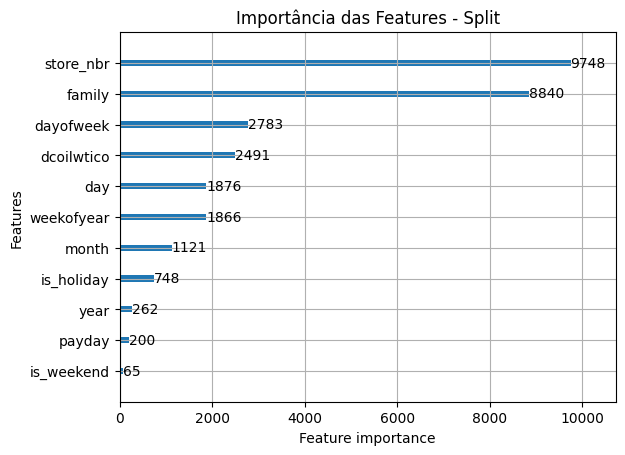

In [56]:
lgb.plot_importance(model, max_num_features=20, importance_type='split')
plt.title("Importância das Features - Split")
plt.show()

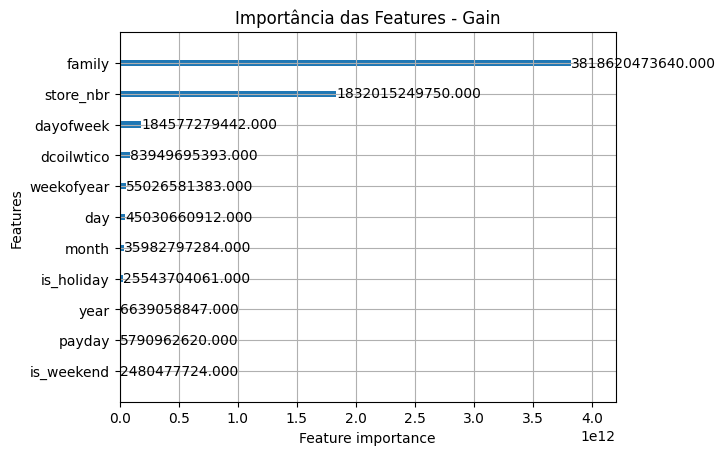

In [57]:
lgb.plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Importância das Features - Gain")
plt.show()

In [58]:
preds = model.predict(X_test, num_iteration=model.best_iteration)

In [59]:
submission = pd.DataFrame({
    'id': df_test['id'],
    'sales': preds
})

In [60]:
submission.to_csv('submission.csv', index=False)

**Leaderboard Score**

1. RMSE - 408 e Score 1.6869
2. RMSE - 403 e Score 1.6244